# Gonorrhea Heterogeneous

$\dot{S_L(t)} = -\lambda_L * S_L(t) + r * I_L(t)$

$\dot{I_L(t)} = \lambda_L * S_L(t) - r * I_L(t)$

$\dot{S_H(t)} = -\lambda_H * S_H(t) + r * I_H(t)$

$\dot{I_H(t)} = \lambda_H * S_H(t) - r * I_H(t)$

$\lambda_L(t) = c_L * \beta_p * p(t)$

$\lambda_H(t) = c_H * \beta_p * p(t)$

$c_H = \frac{c_{mean} - c_L * n_L}{n_H}$

$g_H = \frac{c_H * n_H}{c_L * n_L + c_H * n_H}$

$g_L = 1 - g_H$

$p(t) = g_h * I_H(t) + g_L * I_L(t)$

With variables:

* $S$: Susceptibles
* $I$: Infective
* $\beta$: Transmission probability per partnership
* $r$: Recovery rate
* $c$: Partner change rate
* $p$: Probability of selecting an infected partner

In [3]:
import aux
import model
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
warnings.filterwarnings("ignore",category=DeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 5]

## Model's Code

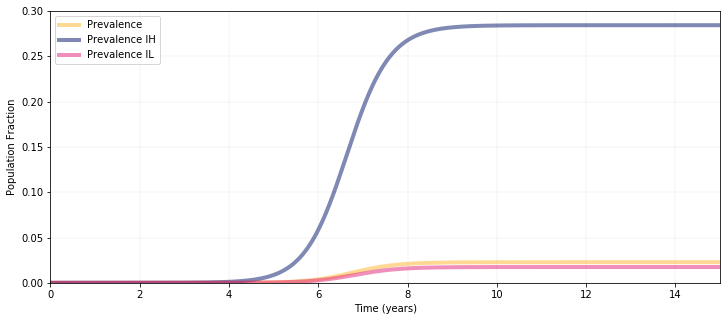

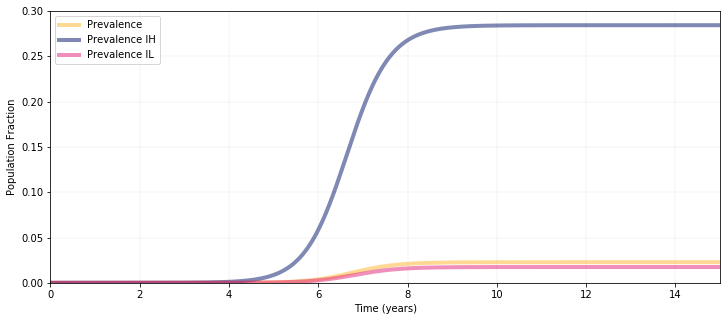

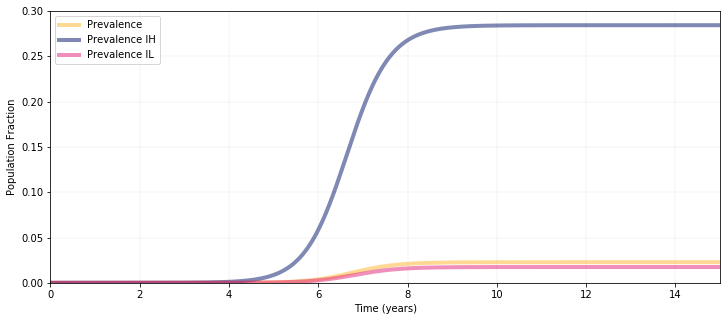

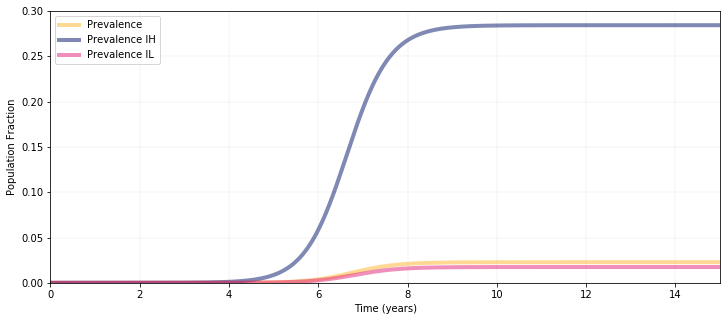

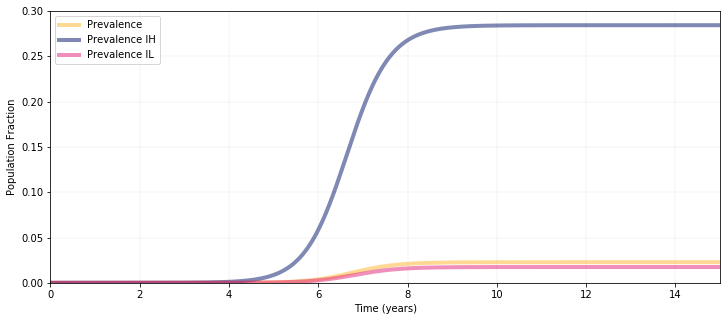

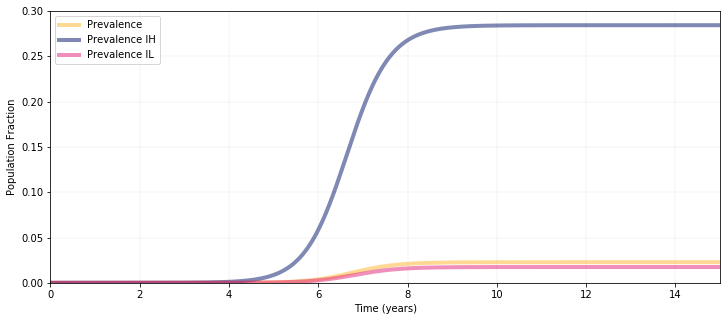

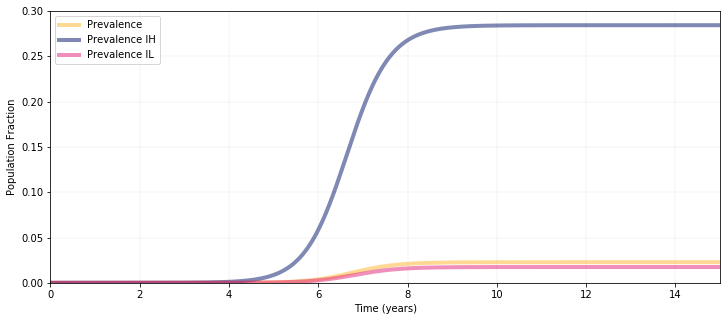

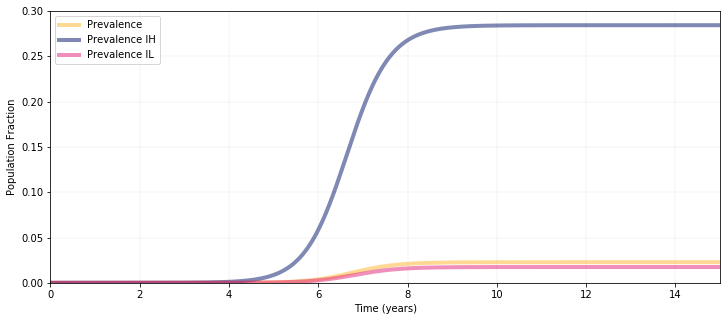

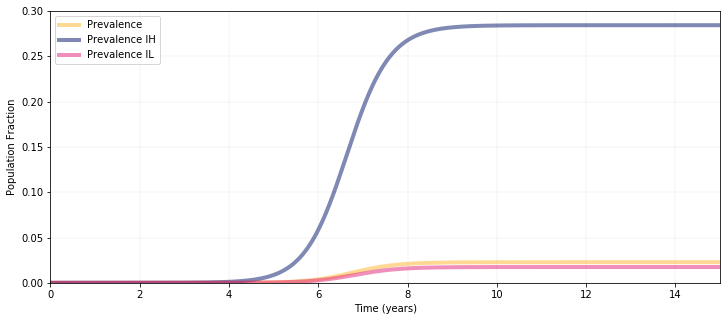

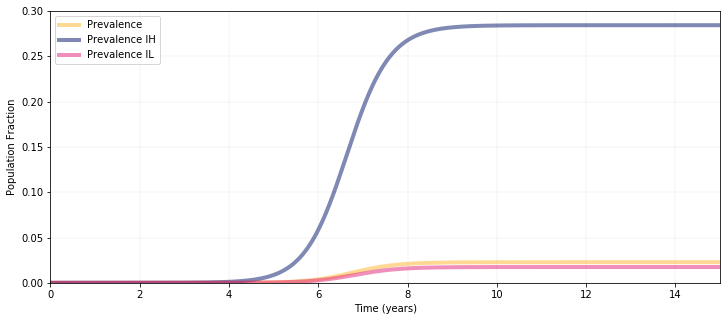

In [15]:
for cl in [i/(10 * 12) for i in range(10, 20, 1)]:
    #################################################################
    # User inputs 
    #################################################################
    (N, tmax)  = (200000000, 15 * 12)
    (beta, rec) = (3/4, 1/2)
    (nH, cMean)  = (0.02, 2/12)
    Inf0 = 1
    #################################################################
    # Internals 
    #################################################################
    nL = 1 - nH
    cH = (cMean - cL * nL)/nH
    gH = (cH * nH) /(cH * nH+ cL * nL)
    gL = 1 - gH
    (SH0, IH0, SL0, IL0) = (N * nH - Inf0, Inf0, N - N * nH, 0)
    y0 = (SH0, IH0, SL0, IL0)
    t = np.linspace(0, tmax, tmax * 10)
    #################################################################
    # Run 
    #################################################################
    ret = odeint(
            model.dGonorrheaHeterogeneous, y0, t,
            args=(N, beta, cL, cMean, nH, nL, rec, gH, gL, cH)
        )
    (SH, IH, SL, IL) = ret.T
    #################################################################
    # Plot 
    #################################################################
    (prev, prevH, prevL) = ((IH + IL) / N, IH/(N * nH), IL/(N * nL))
    tp = (
            (prev, '#ffb428', 'Prevalence'),
            (prevH, '#02146b', 'Prevalence IH'),
            (prevL, '#e21e7b', 'Prevalence IL')
        )
    (fig, ax) = aux.plotEpiDynamicsPop(tp, t/12, tmax/12, 1)
    # ax.set_xticks(np.arange(0, tmax/12, 1))
    # ax.set_yticks(np.arange(0, 1, .1))
    ax.set_ylim(0, .3)
    ax.set_xlim(0, tmax / 12)
    plt.grid(
            b=True, which='major', lw=.2, alpha=.5,
            color='#666666', linestyle='--'
        )

In [13]:
list(range(10, 20, 1))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]